<h1>Homework 2 - Steam Reviews</h1> <br>
Group members: Alessio Barboni, Matteo Broglio 

## Libraries

In [1]:
import pandas as pd, numpy as np, time, matplotlib.pyplot as plt, warnings
from datetime import datetime

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
def get_data(path, cols=None):
    """
    Get the chained dataset of: steam_review.zip + steam_review_bonus_1.zip + steam_review_bouns_2.zip

    Args:
        path (str): Location of the files.
        cols (list): Columns to take. A valid list-like usecols parameter 
                     would be [0, 1, 2] or ['foo', 'bar', 'baz'].

    Returns:
        (pd.Dataframe) Pandas DataFrame of the full dataset
        
    """
    try:
        df = pd.DataFrame()
        for data_name in ['steam_reviews.csv', 
                          'steam_reviews_bonus_1.csv', 
                          'steam_reviews_bonus_2.csv']:
            
            print(f'\nGETTING: {data_name}')
            t0 = time.time()
            
            if cols is None:
                temp = pd.read_csv(path + data_name)
                df = df.append(temp, ignore_index=True)
        
    
            else:
                temp = pd.read_csv(path + data_name, usecols=cols)
                df = df.append(temp, ignore_index=True)
            del temp
            
            print(f'-----ELAPSED TIME: {time.time() - t0}')
            
        return df
    
    except Exception as e:
        print(e)

### RQ1 - Exploratory Data Analysis

In [19]:
#We import one row for each dataframe to verify that each dataset has the same number of columns
df = pd.read_csv("steam_reviews.csv", nrows=1)
df1=pd.read_csv("steam_reviews_bonus_1.csv", nrows=1)
df2=pd.read_csv("steam_reviews_bonus_2.csv", nrows=1)

print(f"""steam_reviews.csv ncols: {len(list(df.columns))}
steam_reviews.csv column names: {list(df.columns)}""")

print(f"""\nsteam_reviews_bonus_1.csv ncols: {len(list(df1.columns))}
steam_reviews_bonus_1.csv column names: {list(df1.columns)}""")

print(f"""\nsteam_reviews_bonus_2.csv ncols: {len(list(df2.columns))}
steam_reviews_bonus_2.csv column names: {list(df2.columns)}""")

#'Unnamed: 0' is column that contains the index of the datasets, the bonus datasets have an additional column named 
#'Unnamed: 0.1', that is a copy of the index ("Unnamed: 0"). In the exercises we will drop these columns.  

df=df.append(df1)
df=df.append(df2)
print("\nThe concatenated dataset:")      
df.head()

steam_reviews.csv ncols: 23
steam_reviews.csv column names: ['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played']

steam_reviews_bonus_1.csv ncols: 24
steam_reviews_bonus_1.csv column names: ['Unnamed: 0', 'Unnamed: 0.1', 'app_id', 'app_name', 'review_id', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'author.steamid', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,Unnamed: 0.1
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1.611382e+09,True,0,...,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09,NaN
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1034410880,1.034411e+09,True,0,...,False,False,76561197926544587,367,10,1909.0,1448.0,1909.0,1.021116e+09,0.0
0,0,252950,Rocket League,53011669,spanish,juegaoz,1560381544,1.560382e+09,True,0,...,False,False,76561197955885927,200,2,32539.0,415.0,2367.0,1.553751e+09,10000001.0


In [5]:
#Columns print
print("The columns are the followings:")
print(*list(df.columns), sep="\n")

The columns are the followings:
Unnamed: 0
app_id
app_name
review_id
language
review
timestamp_created
timestamp_updated
recommended
votes_helpful
votes_funny
weighted_vote_score
comment_count
steam_purchase
received_for_free
written_during_early_access
author.steamid
author.num_games_owned
author.num_reviews
author.playtime_forever
author.playtime_last_two_weeks
author.playtime_at_review
author.last_played
Unnamed: 0.1


In [21]:
#We import the whole dataset with only one column to count the number of rows
df = get_data(path="" ,cols=["received_for_free"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 80.05037569999695

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 36.12962484359741

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 28.163658618927002


In [22]:
print("Number of Rows in the Dataset:", df.shape[0])

Number of Rows in the Dataset: 38747379


**QUANTITATIVE VARIABLES**

In [3]:
#[[Quantitative Variables]] 
numCols = ['votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', "timestamp_created", "timestamp_updated"] #Truly Numerical Variables
df = get_data(path="" ,cols=numCols)


GETTING: steam_reviews.csv
-----ELAPSED TIME: 91.22338843345642

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 89.48498344421387

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 49.16656565666199


In [4]:
#Number of NaN/NA/Missing Values [[Quantitative Variables]]
df.isnull().sum()

timestamp_created                     8
timestamp_updated                     8
votes_helpful                         8
votes_funny                           8
weighted_vote_score                   8
comment_count                         8
author.num_games_owned               16
author.num_reviews                   16
author.playtime_forever              20
author.playtime_last_two_weeks       20
author.playtime_at_review         45683
author.last_played                   18
dtype: int64

We can notice that "author.playtime_at_review" has a large number of Missing Values (NaN), compared to the other columns.

In [5]:
#Column Type print for [[Quantitative Variables]]
print("The type of each column columns is the following:")
print(df.dtypes)

The type of each column columns is the following:
timestamp_created                 float64
timestamp_updated                  object
votes_helpful                      object
votes_funny                       float64
weighted_vote_score               float64
comment_count                     float64
author.num_games_owned            float64
author.num_reviews                float64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object


From the results printed above, we notice that some columns have type "object", a specific data type of *Pandas*, that in Python corresponds to either "str" or a mixture of numeric and non-numeric values. We can manually check the types contained in the columns with the code below:

In [9]:
#Column-Type-Object Type Check for [[Quantitative Variables]]
for x in list(df.select_dtypes(include='object').columns):
    print(f"The column '{x}' has these types:", np.unique(np.vectorize(lambda x: str(type(x)))(df[x])))

The column 'timestamp_updated' has these types: ["<class 'float'>" "<class 'int'>" "<class 'str'>"]
The column 'votes_helpful' has these types: ["<class 'float'>" "<class 'int'>" "<class 'str'>"]


In [5]:
# DEFINE PROCESS_TIMESTAMP FUNCTION
import numbers
def process_timestamp(x):
    """Transofrm digit string timestamps to float and bad values to np.nan.
    Float timestamps are returned without any modification."""
    
    if isinstance(x, bool):
        return np.nan
    elif isinstance(x, numbers.Number):
        return x #x
    elif isinstance(x, str) :
        try:
            return float(x) 
        except ValueError:
            pass
    return np.nan

# PRE-PROCESS DATA WITH process_timestamp( WATCH FUNC. COMMENT FOR INFO)
df['timestamp_created'] = df['timestamp_created'].apply(lambda x: process_timestamp(x))
df['timestamp_updated'] = df['timestamp_updated'].apply(lambda x: process_timestamp(x))

In [10]:
#Cast non-numeric columns to numeric [[Quantitative Variables]]
df = df.fillna(-1) #-1 only for this analysis (it does not belong to the valid range of the variable)
df.votes_helpful = df.votes_helpful.apply(lambda x: 0 if x == 'False' else 1 if x == 'True' else x).astype('int64')              
print("The type of each column columns is the following:")
print(df.dtypes)

The type of each column columns is the following:
timestamp_created                 float64
timestamp_updated                 float64
votes_helpful                       int64
votes_funny                       float64
weighted_vote_score               float64
comment_count                     float64
author.num_games_owned            float64
author.num_reviews                float64
author.playtime_forever           float64
author.playtime_last_two_weeks    float64
author.playtime_at_review         float64
author.last_played                float64
dtype: object


In [19]:
#Columns Summary (mean, standard deviation, overall distribution) for [[Quantitative Variables]]
print("A brief summary of each column is provided below:")
pd.set_option('display.max_columns', 50)
df.describe()

A brief summary of each column is provided below:


,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07,3.874737e+07
mean,1.423774e+09,1.426173e+09,4.540245e+05,1.203789e+05,1.623327e-01,1.255960e-01,1.021681e+06,4.540330e+05,1.641746e+04,1.607804e+02,8.963494e+03,1.439595e+09
std,1.886010e+08,1.890002e+08,1.413086e+09,2.273775e+07,2.421260e-01,2.038740e+00,2.119629e+09,1.413086e+09,3.791796e+04,7.427152e+02,2.420085e+04,2.041778e+08
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.313597e+09,1.315177e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,2.000000e+00,1.237000e+03,0.000000e+00,5.510000e+02,1.303980e+09
50%,1.501319e+09,1.506587e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,4.000000e+00,4.325000e+03,0.000000e+00,1.865000e+03,1.543078e+09
75%,1.575174e+09,1.576639e+09,1.000000e+00,0.000000e+00,4.800000e-01,0.000000e+00,1.420000e+02,9.000000e+00,1.531000e+04,0.000000e+00,6.928000e+03,1.602592e+09
max,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


We can easily observe that many columns have their Third Quartile equal to 0.0, indicating that those columns are quite sparse. 

Below we use *Boxplots* for visualizing better the distribution of "truly" numerical features. They do not always coincide with the numeric type columns of the dataset, e.g., predictors as *app_id* are numerical but they should be rather viewed as categorical variables. 

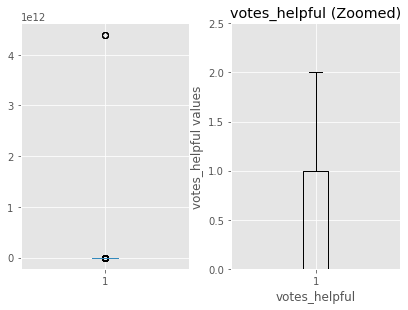

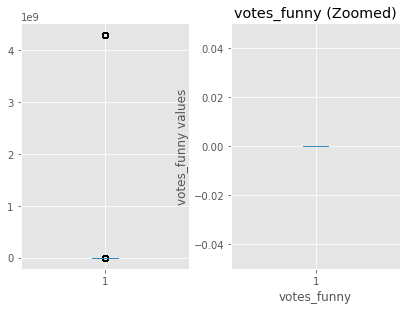

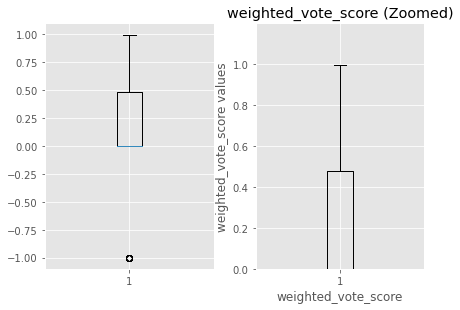

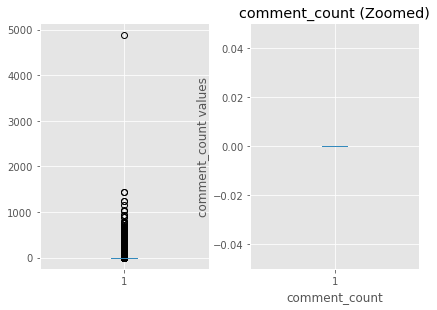

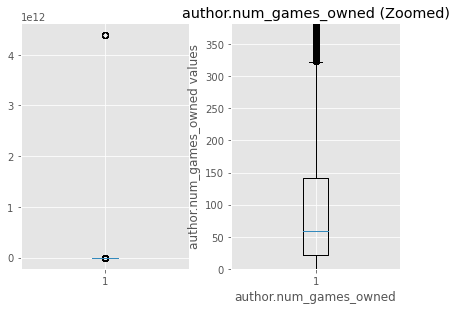

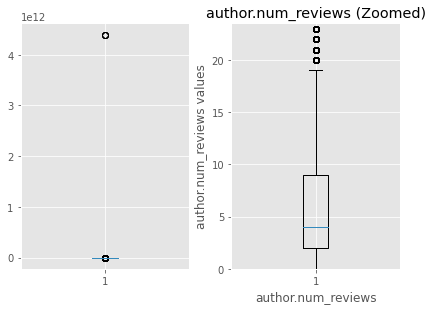

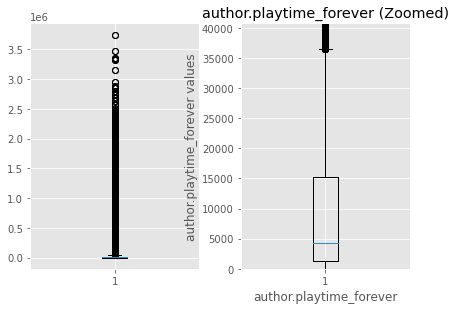

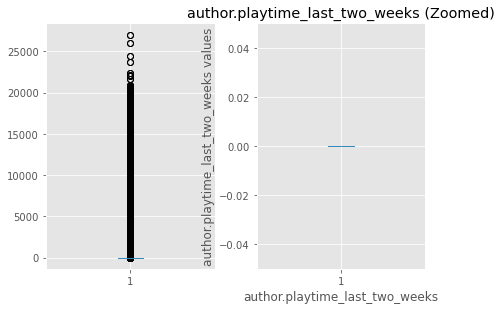

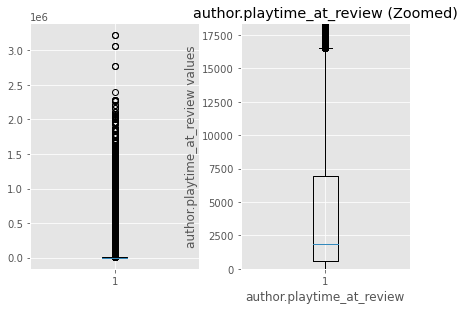

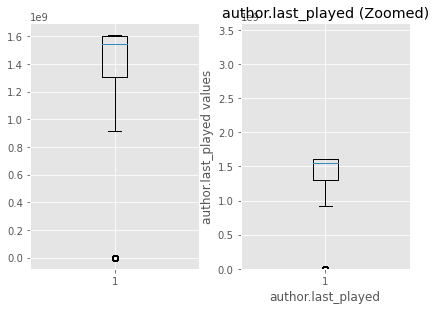

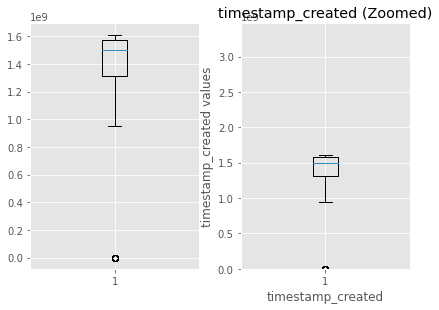

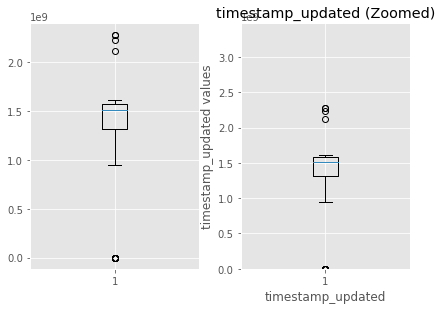

In [20]:
#Boxplots [[Quantitative Variables]]
for x in numCols:       
    figure, axis = plt.subplots(1,2)
    figure.tight_layout()
    axis[0].boxplot(df[x])
    q1, q3 = df[x].quantile([0.25,0.75])
    iqr=q3-q1
    axis[1].set_ylim([0,q3 + iqr*1.5 + df[x].quantile(0.5) ])
    axis[1].boxplot(df[x])
    axis[1].set_title("%s (Zoomed)" % x)
    plt.xlabel(x), plt.ylabel("%s values" %x)

As mentioned above, some columns contain mostly zeros, hence the resulting bloxplot would be like the first four plots, since having overlapping quartiles in zero.
The outliers are the points lying after the end of the whiskers, and they were found using the Interquartile Range rule (*IQR*), i.e., a datapoint is an outlier if it does **not** belong to the interval [Q1-(Q3-Q1)\*1.5, Q3+(Q3-Q1)\*1.5].

In [7]:
#Correlation Plot [[Quantitative Variables]]
print(df[numCols].corr())

                                votes_funny  weighted_vote_score  \
votes_funny                        1.000000             0.275567   
weighted_vote_score                0.275567             1.000000   
comment_count                      0.003482             0.051253   
author.num_games_owned            -0.000003            -0.000059   
author.num_reviews                -0.000002            -0.000215   
author.playtime_forever            0.000281             0.049122   
author.playtime_last_two_weeks    -0.000445            -0.021250   
author.playtime_at_review         -0.000051             0.011476   
author.last_played                -0.000150            -0.002769   
timestamp_created                 -0.003430            -0.024993   
timestamp_updated                 -0.000806            -0.022610   

                                comment_count  author.num_games_owned  \
votes_funny                          0.003482           -2.551477e-06   
weighted_vote_score                  

To make it more clear we could plot the correlation matrix as a *heatmap*.

**Note:** Even if we have got values for the timestamp_updated correlation, in the plot below that column is gray.

Text(0.5, 1.0, 'Correlation Matrix')

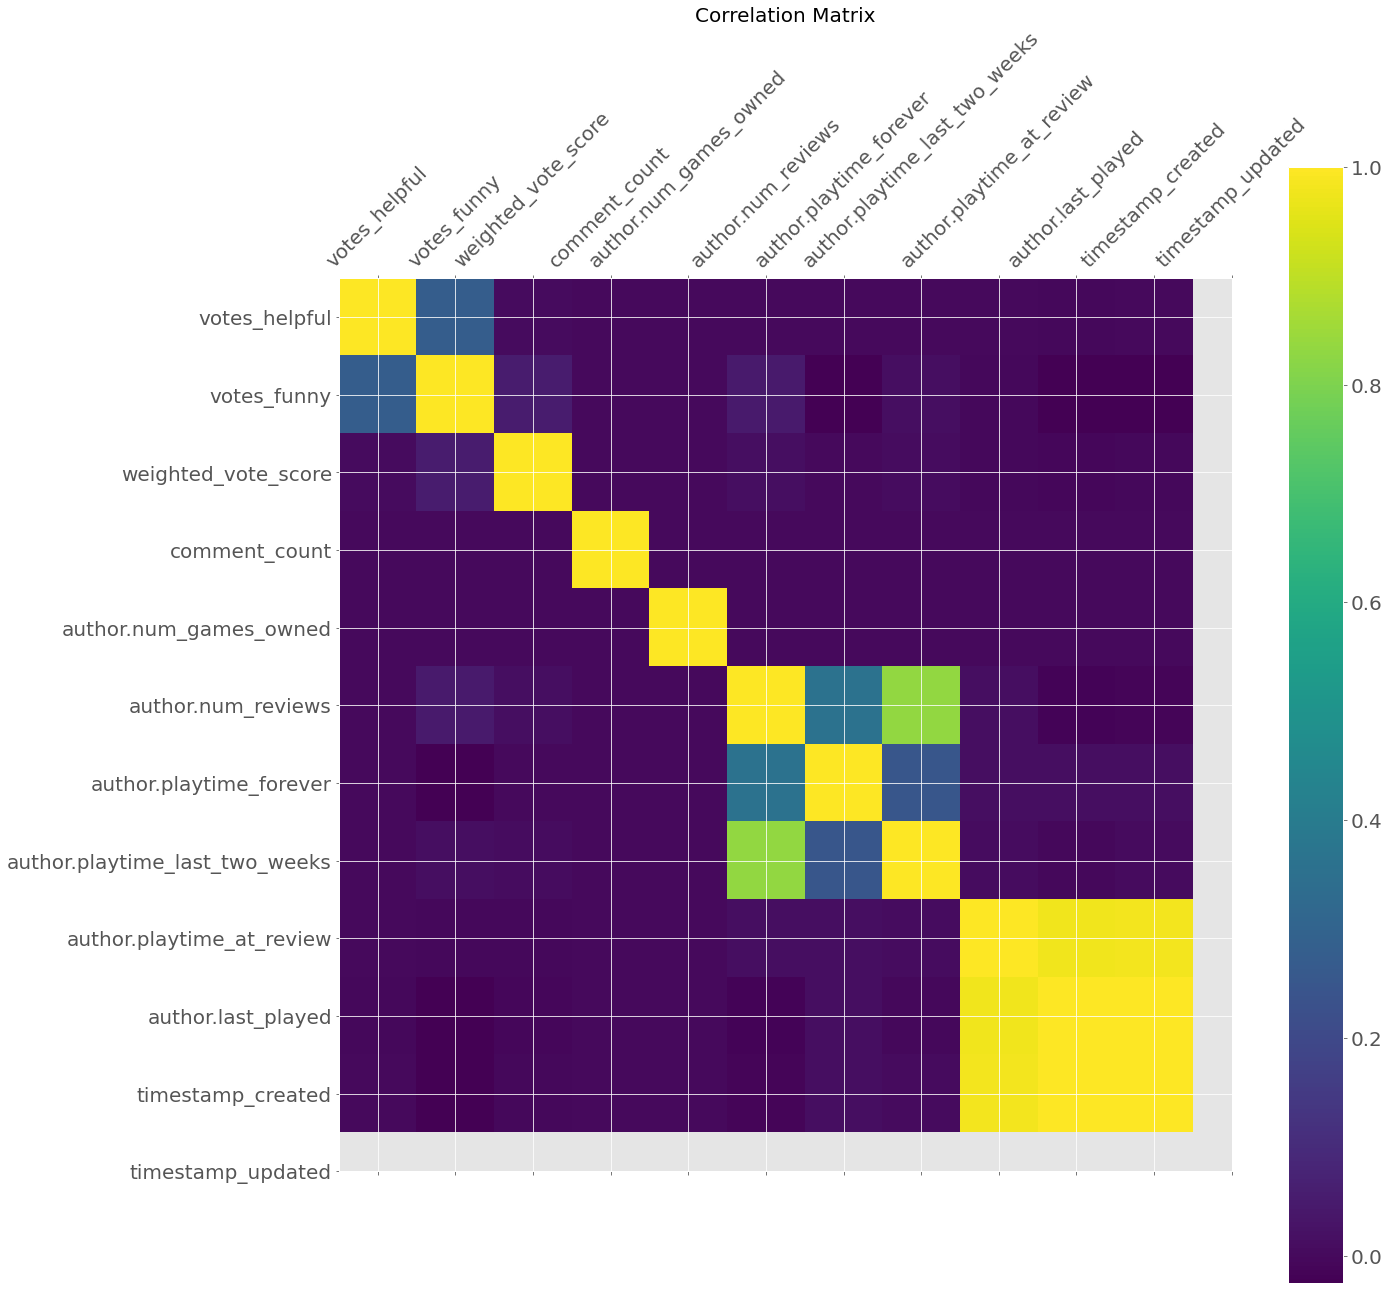

In [6]:
#Correlation Matrix Plot [[Quantitative Variables]]
f = plt.figure(figsize=(20, 20))
plt.matshow(df[numCols].corr(), fignum=f.number)
plt.xticks(range(df[numCols].shape[1]), df[numCols].columns, fontsize=20, rotation=45)
plt.yticks(range(df[numCols].shape[1]), df[numCols].columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=20)

In [5]:
del df

**Qualitative Variables**

In [3]:
#[[Qualitative Variables]]
qualCols = ["app_id", "app_name", "review_id", "language", "recommended", "steam_purchase", "received_for_free", "written_during_early_access", "author.steamid"]
df = get_data(path="" ,cols=qualCols)


GETTING: steam_reviews.csv
-----ELAPSED TIME: 86.05659604072571

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 42.246403217315674

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 35.59400200843811


In [5]:
#Number of NaN/NA/Missing Values [[Qualitative Variables]]
df.isnull().sum()

app_id                         0
app_name                       0
review_id                      0
language                       0
recommended                    8
steam_purchase                 8
received_for_free              8
written_during_early_access    8
author.steamid                 8
dtype: int64

In [6]:
#Column Type print for [[Qualitative Variables]]
#df = get_data(path, cols=None)
print("The type of each column columns is the following:")
print(df.dtypes)

The type of each column columns is the following:
app_id                         float64
app_name                        object
review_id                        int64
language                        object
recommended                     object
steam_purchase                  object
received_for_free               object
written_during_early_access     object
author.steamid                 float64
dtype: object


In [5]:
#Column-Type-Object Type Check for [[Qualitative Variables]]
for x in list(df.select_dtypes(include='object').columns):
    print(f"The column '{x}' has these types:", np.unique(np.vectorize(lambda x: str(type(x)))(df[x])))

The column 'app_name' has these types: ["<class 'str'>"]
The column 'language' has these types: ["<class 'str'>"]
The column 'recommended' has these types: ["<class 'bool'>" "<class 'float'>"]
The column 'steam_purchase' has these types: ["<class 'bool'>" "<class 'float'>" "<class 'str'>"]
The column 'received_for_free' has these types: ["<class 'bool'>" "<class 'float'>" "<class 'str'>"]
The column 'written_during_early_access' has these types: ["<class 'bool'>" "<class 'float'>" "<class 'str'>"]


In [19]:
#Columns Summary (mean, standard deviation, overall distribution) for [[Qualitative Variables]] #anche questo da rerunnare
print("A brief summary of each column is provided below:")
pd.set_option('display.max_columns', 50)
df.describe()

A brief summary of each column is provided below:


,app_id,review_id,recommended,steam_purchase,received_for_free,written_during_early_access,author.steamid
count,3.874738e+07,3.874738e+07,3.874738e+07,3.874738e+07,3.874738e+07,3.874738e+07,3.874738e+07
mean,3.977625e+05,5.206593e+07,8.741024e-01,7.847755e-01,3.095262e-02,1.005797e-01,7.656117e+16
std,6.570122e+05,2.091447e+07,3.317345e-01,1.904229e+01,8.601417e-01,1.317897e+01,4.919800e+13
min,7.000000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.509000e+05,3.658355e+07,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
50%,3.595500e+05,5.427064e+07,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
75%,5.780800e+05,6.955756e+07,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16
max,1.571293e+09,8.521867e+07,1.000000e+00,1.183480e+05,5.245000e+03,8.194200e+04,7.656120e+16


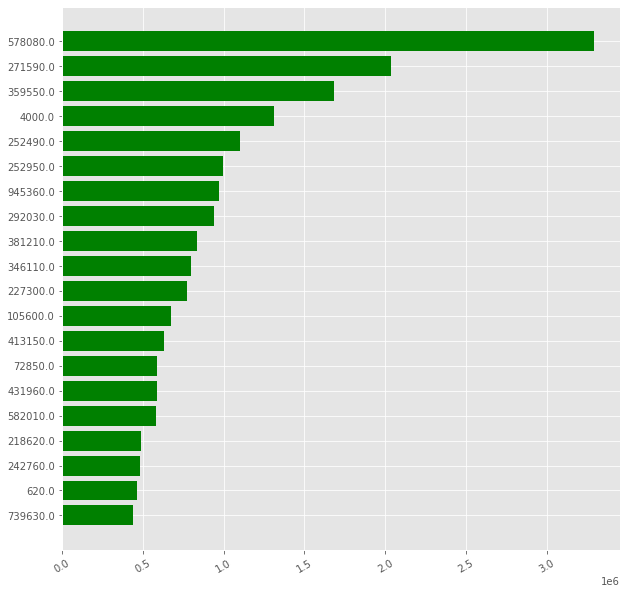

In [19]:
#Bar Plot of comments for each app_id
#We took only the top 20 for a better visualization 

f = df.groupby(["app_id"]).agg(freq=("app_id", "count")).sort_values(by="freq", ascending=False).head(20)
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
plt.barh(f.index.astype("str"), f.freq, color='green')
plt.gca().invert_yaxis()

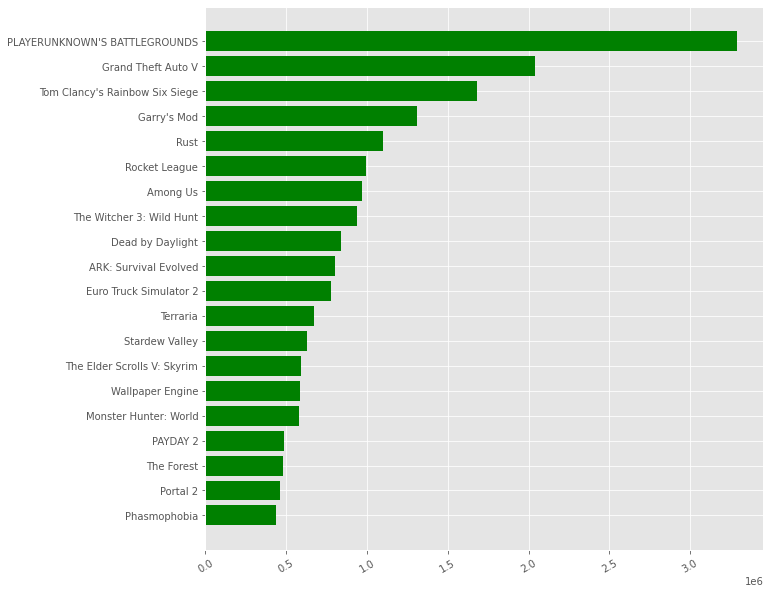

In [20]:
#Bar Plot of comments for each app_name (same plot as app_id, with different y-labels)
#We took only the top 20 for a better visualization 

f = df.groupby(["app_name"]).agg(freq=("app_name", "count")).sort_values(by="freq", ascending=False).head(20)
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
plt.barh(f.index.astype("str"), f.freq, color='green')
plt.gca().invert_yaxis()

In [29]:
#For review_id we cannot 

print("Percentage of unique review_id:",round(len(df.review_id.unique())/len(df)*100, 2))

Percentage of unique review_id: 55.78


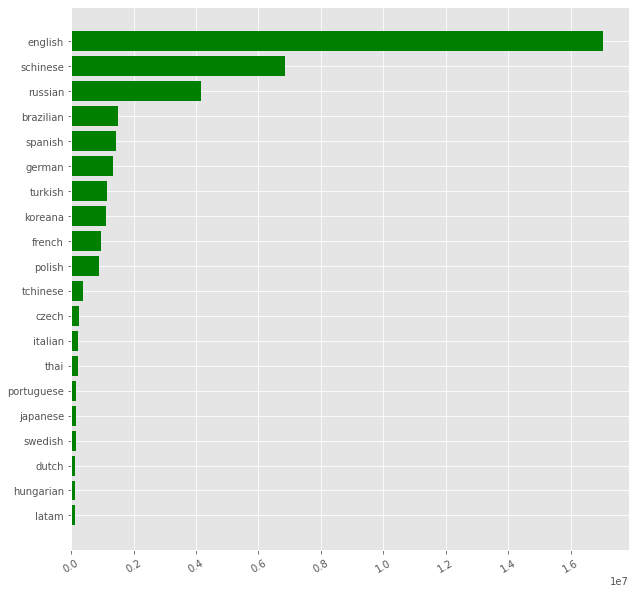

In [30]:
#Bar Plot of comments for each language
#We took only the top 20 for a better visualization 

f = df.groupby(["language"]).agg(freq=("language", "count")).sort_values(by="freq", ascending=False).head(20)
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
plt.barh(f.index.astype("str"), f.freq, color='green')
plt.gca().invert_yaxis()

In [47]:
#Percentage of recommended apps
df.recommended = df.recommended.apply(lambda x: 0 if x == "False" else 1 if x == "True" else x).astype('float64')
f = df.groupby(["recommended"]).agg(freq=("recommended", "count"), 
                                    perc=("recommended", lambda x: round(x.count()/len(df)*100, 2)))
print("Percentage of Recommended (i.e., 1.0) and Not Recommended (i.e., 0.0)")
f.head()

Percentage of Recommended (i.e., 1.0) and Not Recommended (i.e., 0.0)


,freq,perc
recommended,,
0.0,4878185,12.59
1.0,33869186,87.41


In [49]:
#Percentage of steam_purchase apps
df.steam_purchase = df.steam_purchase.apply(lambda x: 0 if x == "False" else 1 if x == "True" else x).astype('float64')
f = df.groupby(["steam_purchase"]).agg(freq=("steam_purchase", "count"), 
                                    perc=("steam_purchase", lambda x: round(x.count()/len(df)*100, 2)))
print("Percentage of apps purchased on Steam (i.e., 1.0) and not purchased on Steam (i.e., 0.0)")
f.head()

Percentage of apps purchased on Steam (i.e., 1.0) and not purchased on Steam (i.e., 0.0)


,freq,perc
steam_purchase,,
0.0,8470295,21.86
1.0,30277068,78.14
243.0,1,0.00
473.0,1,0.00
664.0,1,0.00


We have got three anomaly values.

In [50]:
#Percentage of apps received for free
df.received_for_free = df.received_for_free.apply(lambda x: 0 if x == "False" else 1 if x == "True" else x).astype('float64')
f = df.groupby(["received_for_free"]).agg(freq=("received_for_free", "count"), 
                                    perc=("received_for_free", lambda x: round(x.count()/len(df)*100, 2)))
print("Percentage of Apps received for free (i.e., 1.0) and Not received for free (i.e., 0.0)")
f.head()

Percentage of Apps received for free (i.e., 1.0) and Not received for free (i.e., 0.0)


,freq,perc
received_for_free,,
0.0,37553274,96.92
1.0,1194096,3.08
5245.0,1,0.00


We have got one anomaly value.

In [51]:
#Percentage of reviews written during early access
df.written_during_early_access = df.written_during_early_access.apply(lambda x: 0 if x == "False" else 1 if x == "True" else x).astype('float64')
f = df.groupby(["written_during_early_access"]).agg(freq=("written_during_early_access", "count"), 
                                    perc=("written_during_early_access", lambda x: round(x.count()/len(df)*100, 2)))
print("Percentage of reviews written during early access (i.e., 1.0) and Not written during early access (i.e., 0.0)")
f.head()

Percentage of reviews written during early access (i.e., 1.0) and Not written during early access (i.e., 0.0)


,freq,perc
written_during_early_access,,
0.0,34939139,90.17
1.0,3808224,9.83
211.0,1,0.00
274.0,1,0.00
631.0,1,0.00


We have got three anomaly values.

The count of the column author.steamid is performed in RQ5

In [1]:
DA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEEDA TAGLIAREEEEEE

SyntaxError: invalid syntax (<ipython-input-1-302bbed78b4f>, line 1)

In [27]:
df.groupby("review_id").agg(count=("review_id","count")).sort_values(by="count", ascending=False).head()
#review_id.count()

,count
review_id,
0,6
83462819,3
83461602,3
65667423,3
52435632,3


In [28]:
df[df.review_id == 83462819]

,app_id,app_name,review_id,language,recommended,steam_purchase,received_for_free,written_during_early_access,author.steamid
3614910,367520.0,Hollow Knight,83462819,english,True,False,False,False,7.656120e+16
21476003,367520.0,Hollow Knight,83462819,english,True,False,False,False,7.656120e+16
25362282,367520.0,Hollow Knight,83462819,english,True,True,False,False,7.656120e+16


In [ ]:
#Bar Plot of comments for each review_id 
#We took only the top 20 for a better visualization 

f = df.groupby(["app_name"]).agg(freq=("app_name", "count")).sort_values(by="freq", ascending=False).head(20)
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
plt.barh(f.index.astype("str"), f.freq, color='green')
plt.gca().invert_yaxis()

In [ ]:
del df

**Review Column**

In [3]:
df = get_data(path="" ,cols=["review"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 108.33828377723694

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 56.64871549606323

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 50.49012279510498


In [4]:
#Number of NaN/NA/Missing Values [[Qualitative Variables]]
df.isnull().sum()

review    60526
dtype: int64

In [7]:
#We drop Missing Value Columns
df = df.dropna()

In [5]:
#Column Type
print(df.dtypes)

review    object
dtype: object


In [8]:
df["length"] = np.vectorize(lambda x: len(x))(df.review)

In [11]:
del df["review"]

In [12]:
#Summaries of reviews length
df.length.describe()

count    3.868685e+07
mean     1.646408e+02
std      4.276502e+03
min      1.000000e+00
25%      1.200000e+01
50%      3.800000e+01
75%      1.260000e+02
max      9.639004e+06
Name: length, dtype: float64

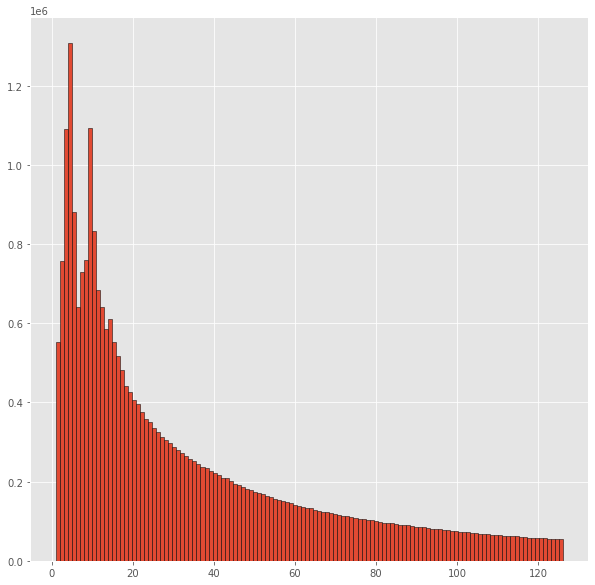

In [24]:
df2=df.query("length<=126")
plt.figure(figsize=(10,10))
ax = plt.hist(df2.length, bins=126, edgecolor="black")
plt.show()

### RQ2 -  Reviews Insigths

In [5]:
#Import dataset for RQ2
df = get_data(path="" ,cols=["app_name"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 79.78532361984253

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 35.0084969997406

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 27.938361883163452


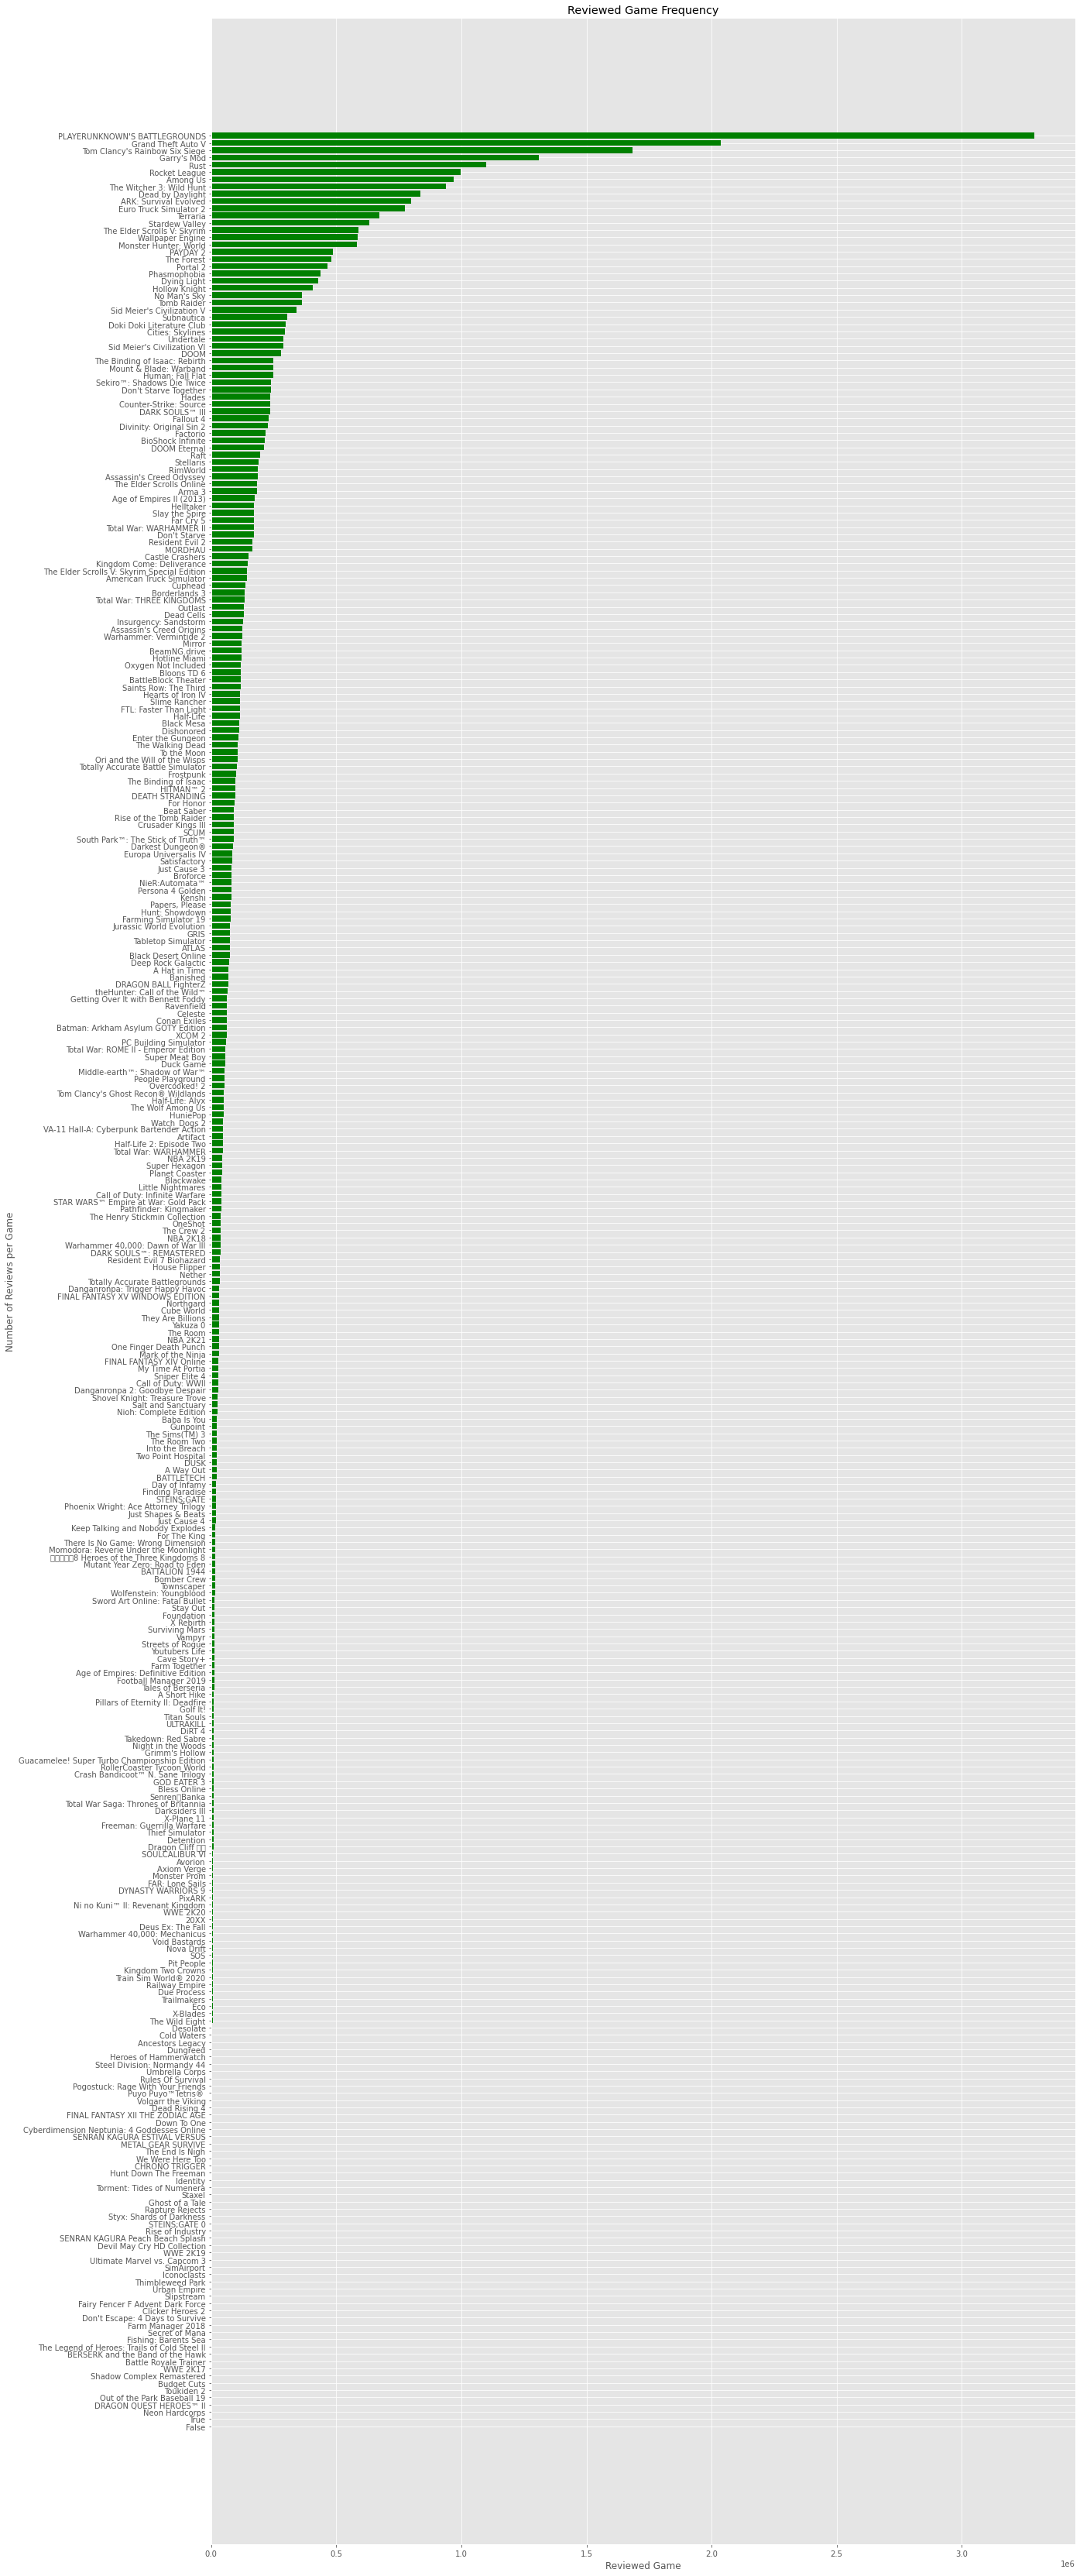

In [14]:
#Plot the number of reviews for each application in descending order
d_name = df.groupby(["app_name"])["app_name"].count().to_dict()
sortName = sorted(d_name.items(), key=lambda x: x[1], reverse=True)
plt.figure(figsize=(20, 60))
plt.barh([x[0] for x in sortName], [x[1] for x in sortName], color='green')
plt.gca().invert_yaxis()
plt.yticks([x[0] for x in sortName], [x[0] for x in sortName])
plt.title("Reviewed Game Frequency"), plt.xlabel('Reviewed Game'), plt.ylabel('Number of Reviews per Game')
plt.show()

In [ ]:
del df

In [5]:
df = get_data(path="" ,cols=["app_name","weighted_vote_score","recommended"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 85.17753577232361

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 44.113670110702515

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 31.65300726890564


In [8]:
#What applications have the best Weighted Vote Score?
df = df.drop(df[(df.app_name=="True") | (df.app_name=="False")].index)

bestScore = max(df["weighted_vote_score"])
print(f"The applications with the Best Score {bestScore:.3f} are:", set(list(df[df["weighted_vote_score"]==bestScore]["app_name"])), sep=" ")

The applications with the Best Score 0.996 are: {'Stardew Valley'}


In [10]:
#Which applications have the most and the least recommendations?
recCount=df.groupby("app_name").agg(countRecom = ("recommended", "sum"))
leastRec, mostRec = recCount[recCount.countRecom == recCount.countRecom.min()], recCount[recCount.countRecom == recCount.countRecom.max()]
print("Least Recommended Applications: \n",leastRec)
print("Most Recommended Applications: \n",mostRec)

Least Recommended Applications: 
                 countRecom
app_name                  
Neon Hardcorps         178
Most Recommended Applications: 
                                countRecom
app_name                                 
PLAYERUNKNOWN'S BATTLEGROUNDS     1772834


In [ ]:
del df

In [3]:
df = get_data(path="" ,cols=["received_for_free","app_name","steam_purchase"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 83.5562355518341

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 36.3342719078064

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 29.379542589187622


We counted the percentage of purchased app, considering the two applications found in the questions above (i.e., "Stardew Valley", "Neon Hardcorps", "PLAYERUNKNOWN'S BATTLEGROUNDS").

In [22]:
#We select only the columns corresponding to the three games
df1=df.query('app_name=="Stardew Valley" or app_name=="Neon Hardcorps" or app_name=="PLAYERUNKNOWN\'S BATTLEGROUNDS"')


In [23]:
#Preprocessing
df1.received_for_free = df1.received_for_free.apply(lambda x: False if x == "False" else True if x == "True" else x)

In [24]:
#We aggregate each game with the variable received_for_free
df1.groupby(["app_name","received_for_free"]).agg(count=("app_name","count"))

count
app_name                      received_for_free         
Neon Hardcorps                False                  365
                              True                    35
PLAYERUNKNOWN'S BATTLEGROUNDS False              3180660
                              True                107848
Stardew Valley                False               615873
                              True                 15561

In [ ]:
del df

### RQ3 -  Preferred time to do Reviews

In [4]:
#Import the dataset with the specified columns
df = get_data(path="" ,cols=["timestamp_created"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 80.9560694694519

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 36.504571199417114

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 27.044580459594727


In [5]:
#Drop missing values
df = df.dropna()
#Cast unix timestamps into date time objects (%H%M)
df.timestamp_created = df.timestamp_created.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%H:%M'))
#Output the most common writing time aggregating on timestamp_created
print("Most common time for writing a review is %s " %df.groupby(["timestamp_created"])["timestamp_created"].count().idxmax()) #cambialo con agg!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Most common time for writing a review is 14:50 


In [20]:
#Cast to float64
df.timestamp_created=df.timestamp_created.astype("float64")

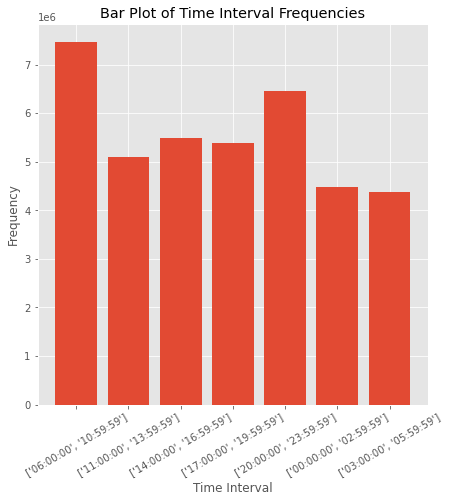

In [22]:
#Cast unix timestamp to date time object with seconds as well (%H%M%S)
df.timestamp_created = df.timestamp_created.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%H:%M:%S'))
#Remove day/month/year from datatime object
df.timestamp_created = df.timestamp_created.apply(lambda x: datetime.strptime(x, '%H:%M:%S'))

#Required Function
def func(timeInterv, dF):
    l=[]
    for x in timeInterv:
        #Cast string to datetime object (%H:%M:%S)
        t0, t1 = datetime.strptime(x[0],'%H:%M:%S'), datetime.strptime(x[1],'%H:%M:%S') 
        #We subset the dataset taking only values contained in the specified interval
        viewDf = dF[(dF.timestamp_created > t0) & (dF.timestamp_created < t1)] 
        l.append([x, len(viewDf)])
    #Bar plot of the results
    plt.figure(figsize=(7,7))
    plt.bar([str(x[0]) for x in l], [x[1] for x in l])
    plt.title("Bar Plot of Time Interval Frequencies"),plt.xlabel('Time Interval'),plt.ylabel('Frequency'),plt.xticks(rotation=30)
    plt.show()

#Function call with specified intervals
func([["06:00:00", "10:59:59"], ["11:00:00", "13:59:59"], ["14:00:00", "16:59:59"], ["17:00:00", "19:59:59"],["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"], ["03:00:00", "05:59:59"]], df)


In [ ]:
del df

### RQ4 - Languages

In [3]:
#Import dataset for RQ4
df = get_data(path="" ,cols=["language"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 82.03477358818054

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 33.82940649986267

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 25.875608682632446


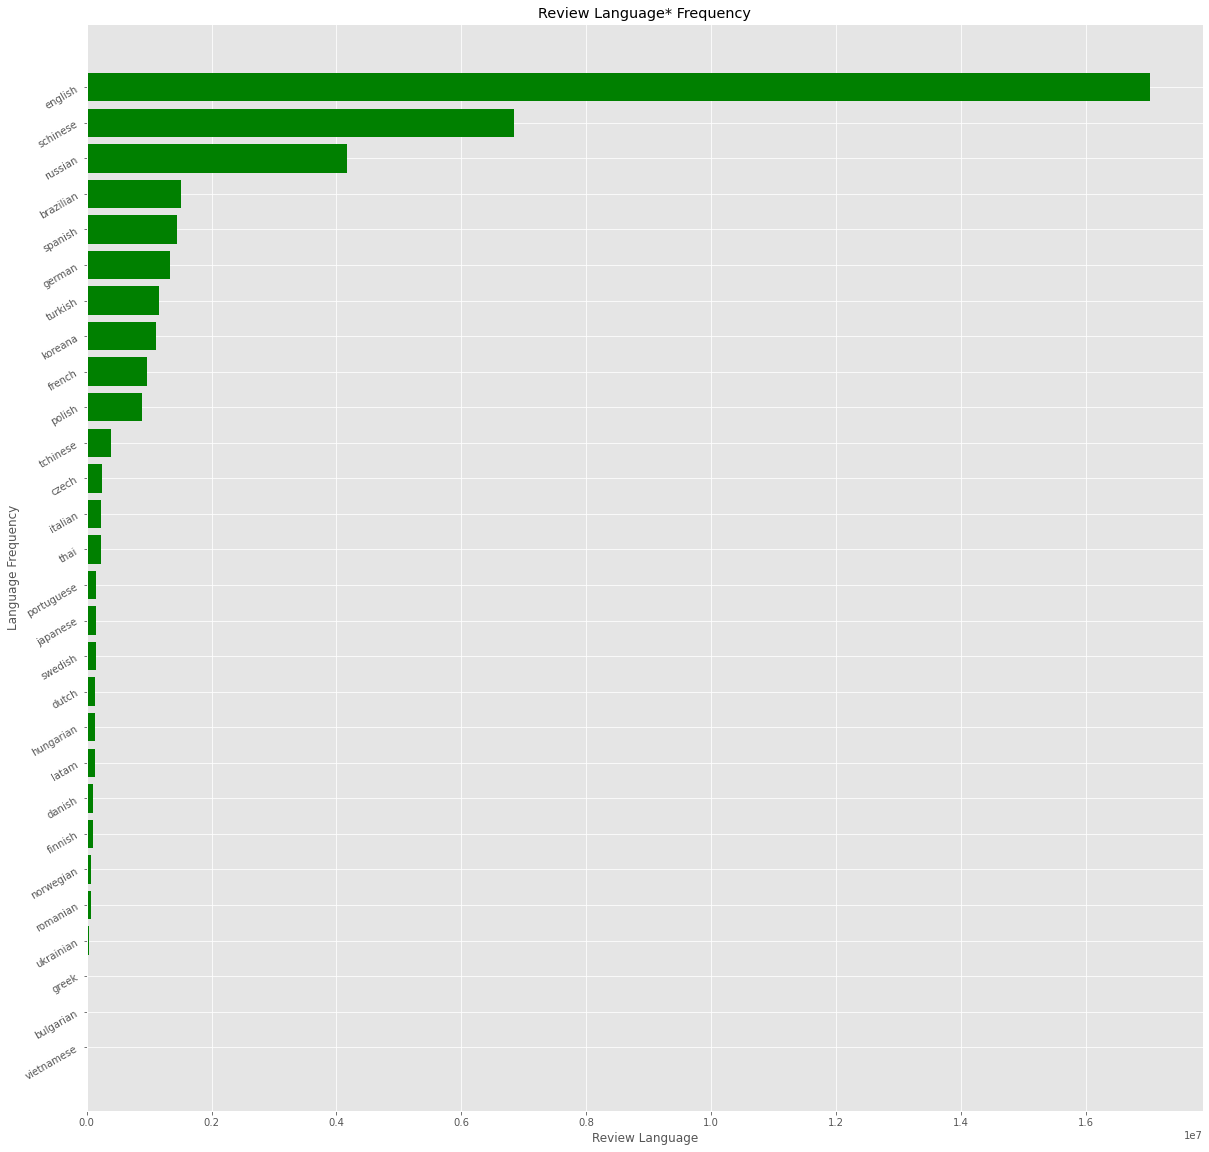

In [10]:
#What are the top 3 languages used to review applications?

#We create a dictionary with key-value: language-count
d_lan = df.query("language!='0'").groupby(["language"])["language"].count().to_dict()

#Sorting by count in reverse order
sortLan = sorted(d_lan.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(20,20))
plt.barh([x[0] for x in sortLan], [x[1] for x in sortLan], color='green')
plt.gca().invert_yaxis()
plt.yticks([x[0] for x in sortLan], [x[0] for x in sortLan], rotation=30)
plt.title("Review Language* Frequency"), plt.xlabel('Review Language'), plt.ylabel('Language Frequency')
plt.show()

In this exercise we let the traditional chinese (*tchinese*) and Simplified Chinese (*schinese*) be separated entities, this choice is not affecting the ordering as we can notice from the plot above, since adding the two columns would leave the same order.

In [5]:
#Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
def subsetByLanguage(dF, langList):
    return dF[dF.language.isin(langList)]

subsetByLanguage(df, ["english","schinese"]) #We passed two parameters to check if it works correctly

,language,votes_helpful,votes_funny
0,schinese,0,0.0
1,schinese,0,0.0
2,schinese,0,0.0
3,english,0,0.0
4,schinese,0,0.0
...,...,...,...
38747370,english,0,0.0
38747372,english,0,1.0
38747373,english,1,0.0
38747375,english,1,0.0


In [ ]:
del df

In [3]:
df = get_data(path="" ,cols=["language", "votes_funny","votes_helpful"])


GETTING: steam_reviews.csv
-----ELAPSED TIME: 79.34893918037415

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 41.63626217842102

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 27.979896306991577


In [6]:
#Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

#We create a dictionary with key-value: language-count
d_lan = df.groupby(["language"])["language"].count().to_dict()
#Sorting by count in reverse order
sortLan = sorted(d_lan.items(), key=lambda x: x[1], reverse=True)
#We select the top three languages with the highest count value
top3Lang = [x[0] for x in sortLan[:3]]
#We subset the dataset selecting only the rows containing one of the top languages
viewDf = subsetByLanguage(df, top3Lang)
#Since we are not interested in the specific amount of funny votes that the comment received, 
#but rather on the fact that the review got at least one vote funny, we can create a binary dummy variable with just zeros 
#and ones that is useful for the groupby below 
viewDf["isFunny"] = np.vectorize(lambda x: 1 if x>=1 else 0)(viewDf["votes_funny"])
percFunny = viewDf.groupby(["language"]).agg(funnyPerc = ("isFunny", lambda value: round(100 * (value.sum() / value.count()),2)))
print("Percentage of top 3 languages applications voted as Funny: \n", percFunny)

Percentage of top 3 languages applications voted as Funny: 
           funnyPerc
language           
english       11.27
russian       14.31
schinese      11.61


In [11]:
#Preprocessing and Casting for votes_helpful column
df.votes_helpful= df.votes_helpful.apply(lambda x: 0 if x == 'False' else 1 if x == 'True' else x).astype('float64')

In [12]:
#Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?
#Same steps as below for the votes_funny column
viewDf = subsetByLanguage(df, top3Lang)
viewDf["isHelpful"] = np.vectorize(lambda x: 1 if x>=1 else 0)(viewDf["votes_helpful"])
percHelp = viewDf.groupby(["language"]).agg(funnyPerc = ("isHelpful", lambda value: round(100 * (value.sum() / value.count()),2)))
print("Percentage of top 3 languages applications voted as Helpful: \n", percHelp)


Percentage of top 3 languages applications voted as Helpful: 
           funnyPerc
language           
english       28.11
russian       31.69
schinese      26.00


### RQ5 - Authors of Reviews

In [3]:

# =============================================================================
# RQ5        
# =============================================================================

data_5 = get_data( # GETTING DATASET (BASE + BONUSES) WITH SPECIFIC COLUMNS
                path="",
                cols=['author.steamid',
                      'app_id',
                      'app_name',
                      'steam_purchase',
                      'received_for_free',
                      'author.num_reviews', 
                      'comment_count',
                      'votes_helpful',
                      'votes_funny',
                      'recommended',
                      ]) \
            .dropna( # DROPPING ROWS WITH ALL NAN
                    how='all') \
            .rename(columns={ # RENAMING COLUMNS FOR ISSUES WITH `.`
                'author.steamid': 'author_steamid',
                'author.num_reviews': 'author_num_reviews'
                }) \
            .astype({ # Casting to int64
                'author_steamid': 'int64',
                'author_num_reviews': 'int64',
                'votes_helpful': 'int64',
                'votes_funny': 'int64'
                }, errors='ignore')



GETTING: steam_reviews.csv
-----ELAPSED TIME: 84.50045466423035

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 43.31221866607666

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 36.23712205886841


In [4]:
# COUNT OF NaN
data_5.isnull().sum()

app_id                 0
app_name               0
recommended            8
votes_helpful          8
votes_funny            8
comment_count          8
steam_purchase         8
received_for_free      8
author_steamid         8
author_num_reviews    16
dtype: int64

**POPULARITY:** Our proposal of popularity is a combinations of:
  - R: # of reviews
  - C: mean # of comments
  - H: mean # of helpful votes
  - F: mean # of funny votes

We use median due to its robustness' properties.

Our index proposal is:
    
    POPULARITY = log_2(R+1) * C + (1/2 * (log_2(R+1)) * H + (1/2 * (log_2(R+1)) * F
    
where we use R with log(base: 2) transformation in order to reduce weights
of reviewers with too much reviews. In order to avoid -inf or 0 with the 
log transformation, we will use log_2(R+1). In fact:
    
    R >= 1 for each userId( we have at least 1 comment for each user)
    log_2(R+1) >= 1 

The idea is based to the social media concept of *'engagement'*, a score based on multiple factors like: # likes, # comments, # repost, etc.. Here we combined each factor with a specific weight with the number of reviews( as log_2).

**NOTE:** We knOw this isn't the best index, but we tried to summarize 
informations coming from different attributes( columns).

**NOTE2:** In the excercise we calculate relative popularity, i.e. popularity
related to the dataset and its range time. So, we avoided the info *'author_num_reviews'*. In fact, *'author_num_reviews'* is a statistic about all the acivities of the user, whereas *'votes_helpful'*, *'votes_funny'* and *'comment_count'* are related to each specific comment so in the specific range of time of the dataset.

In [4]:
# =============================================================================
# 5.1
# =============================================================================

# SUBSET DATASET & FILL NaN WITH -1 
# NOTE: 
data_5_1 = data_5[['author_steamid', 
                   'comment_count',
                   'author_num_reviews', 
                   'votes_helpful', 
                   'votes_funny']] \
            .copy() \
            .fillna(-1)

# PREPROCESS DATA
# PROCESS HELPFUL VOTES - IN PYTHON 0 is False and 1 is True. So we
# transform string True and False in 1 and 0 and then change column
# data type to int64.
data_5_1['votes_helpful'] = data_5_1['votes_helpful'] \
                            .apply(lambda x: 0 if x == 'False' else \
                                   1 if x == 'True' else x) \
                            .astype('int64')

# FILTER DATA WITH ANOMALIES
# ANOMALIES ARE DESCRIBED IN THE QUERY
data_5_1 = data_5_1.query(
                " ".join([
                    "author_num_reviews < 10000" ,
                    "and votes_helpful  < 100000 ",
                    "and votes_funny < 100000"
                    ])
                )

# DEFINE POPULARITY FUNCTION
def popularity(R, C, H, F):
    return (np.log(R+1) * C) + ((1 / 2) * (np.log(R+1) * H)) + ((1 / 2) * (np.log(R+1) * F))

# DATA AGGREGATION 
stats_5_1 = data_5_1.groupby(['author_steamid']) \
    .agg(# AGGREGATE DATA
        reviews_count=('author_num_reviews', 'count'),
        mean_comments=('comment_count', 'mean'),
        mean_helpful=('votes_helpful', 'mean'),
        mean_funny=('votes_funny', 'mean')
        ) 

# CALCULATE POPOLARITY. WE USE NUMPY.VECTORIZE INSTEAD OF PANDAS.APPLY
# BECAUSE IT'S FASTER ON DATASETS WITH BILLIONS OF ROWS            
stats_5_1['popularity'] = np.vectorize(popularity)(stats_5_1['reviews_count'], 
                                                   stats_5_1['mean_comments'],
                                                   stats_5_1['mean_helpful'], 
                                                   stats_5_1['mean_funny'])     
      
# GET TOP 10 POPULAR USERS     
# 1- SORTING BY POPULARITY DESCENDING
# 2- GET TOP 10 ROWS
# 3- SET author_steamid AS A COLUMN
  
top_10 = stats_5_1.sort_values(by='popularity', 
                               ascending=False) \
            .head(10) \
            .reset_index()

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '8')]

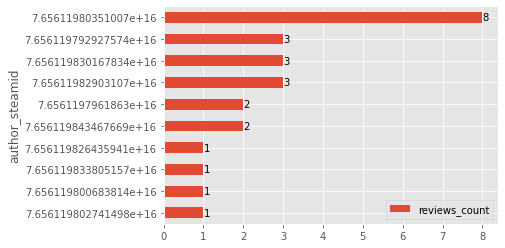

In [5]:
# PLOT TOP_10 BY REVIEWS_COUNT
# ax_bar_label NEEDED TO SHOW VALUES IN THE PLOT
ax = top_10 \
        .sort_values(by='reviews_count') \
        .plot(y='reviews_count', x='author_steamid', kind='barh') 
ax.bar_label(ax.containers[0])

In [6]:
# =============================================================================
# 5.2
# =============================================================================

# SUBSET DATA WITH ALL THE ROWS OF MOST POPULAR author_id
data_5_2 = data_5.copy().query( f"author_steamid == {top_10.loc[0, 'author_steamid']}")

# MOST POPULAR USER'S REVIEWS
print("Applications of the most popular author review")
print(data_5_2[['app_id', 'app_name']])

Applications of the most popular author review
           app_id app_name
7824298  252490.0     Rust


In [7]:
# =============================================================================
# 5.3
# =============================================================================

# PRE PROCESS COLUMNS. TRANFORM ALL VALUES != TRUE/FALSE IN -1
data_5_3 = data_5_2.copy()

data_5_3['steam_purchase'] = data_5_3['steam_purchase'] \
    .apply(lambda value: True if value in (True, 'True', 'true') \
           else False if value in (False, 'False', 'false') else -1)
        
data_5_3['received_for_free'] = data_5_3['received_for_free'] \
    .apply(lambda value: True if value in (True, 'True', 'true') \
           else False if value in (False, 'False', 'false') else -1)        

# PRE PROCESS COLUMNS. GET ONLY TRUE OR FALSE ROWS. 
# REMEMBER: TRUE == 1 AND FALSE == 0 ALSO FOR COMPARISON
data_5_3 = data_5_3.query('received_for_free > -1 or steam_purchase > -1')

# GET INFO REQUIRED IN POINT 5.3
stats_5_3 = data_5_3 \
    .groupby('author_steamid') \
    .agg(
        # purchase_count ARE BOOL, BUT IN PYTHON True == 1 AND False == 0
        # SO WE CAN SUM THEM
        apps_num=('app_id', 'count'),
        purchased_count=('steam_purchase', 'sum'), 
        for_free_count=('received_for_free', 'sum') ,  
        # CALCULATE PERFENTAGE FOR BOTH PURCHASED & FOR FREE
        perc_purchased=('steam_purchase', lambda value: 100 * (value.sum() / value.count())),
        perc_for_free=('received_for_free', lambda value: 100 * (value.sum() / value.count()))
        ) 

pd.set_option('display.max_columns', 10)
print(stats_5_3)

                apps_num  purchased_count  for_free_count  perc_purchased  \
author_steamid                                                              
7.656120e+16           1                1               0           100.0   

                perc_for_free  
author_steamid                 
7.656120e+16            False  


In [8]:
# =============================================================================
# 5.4
# =============================================================================

data_5_4 = data_5_3.copy()

# GET INFO REQUIRED IN POINT 5.4
stats_5_4 = data_5_4 \
    .groupby('recommended') \
    .agg(
        # purchase_count ARE BOOL, BUT IN PYTHON True == 1 AND False == 0
        # SO WE CAN SUM THEM
        apps_num=('app_id', 'count'),
        purchased_count=('steam_purchase', 'sum'), 
        for_free_count=('received_for_free', 'sum') ,  
        # CALCULATE PERFENTAGE FOR BOTH PURCHASED & FOR FREE
        perc_purchased=('steam_purchase', lambda value: 100 * (value.sum() / value.count())),
        perc_for_free=('received_for_free', lambda value: 100 * (value.sum() / value.count()))
        ) 
    
print(stats_5_4)

             apps_num  purchased_count  for_free_count  perc_purchased  \
recommended                                                              
True                1                1               0           100.0   

             perc_for_free  
recommended                 
True                 False  


In [9]:
# IN ORDER TO FREE SPACE IN MEMORY
del data_5; del data_5_4; del data_5_3; del data_5_2; del data_5_1; del stats_5_4; del stats_5_3; del stats_5_1

### RQ6

In [10]:
# =============================================================================
# GET DATA AND PRE-PROCESSING       
# =============================================================================
import numbers
from datetime import timedelta

data_6 = get_data( # GETTING DATASET (BASE + BONUSES) WITH SPECIFIC COLUMNS
                path="",
                cols=['author.steamid',
                      'app_id',
                      'timestamp_created',
                      'timestamp_updated',
                      ]) \
            .dropna( # DROPPING ROWS WITH ALL NAN
                    how='all') \
            .rename(columns={ # RENAMING COLUMNS FOR ISSUES WITH `.`
                'author.steamid': 'author_steamid',
                }) \
            .astype({
                'author_steamid': 'int64',
                }, errors='ignore')


GETTING: steam_reviews.csv
-----ELAPSED TIME: 84.46024131774902

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 36.02093458175659

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 29.936570644378662


In [12]:
# DEFINE PROCESS_TIMESTAMP FUNCTION
def process_timestamp(x):
    """Transofrm digit string timestamps to float and bad values to np.nan.
    Float timestamps are returned without any modification."""
    
    if isinstance(x, bool):
        return np.nan
    elif isinstance(x, numbers.Number):
        return x #x
    elif isinstance(x, str) :
        try:
            return float(x) 
        except ValueError:
            pass
    return np.nan

# PRE-PROCESS DATA WITH process_timestamp( WATCH FUNC. COMMENT FOR INFO)
data_6['timestamp_created'] = data_6['timestamp_created'].apply(lambda x: process_timestamp(x))
data_6['timestamp_updated'] = data_6['timestamp_updated'].apply(lambda x: process_timestamp(x))

# FILTER NAN
data_6 = data_6.dropna()

In [13]:
# =============================================================================
# 6.1
# =============================================================================
# CALCULATE DELTA TIME
data_6['delta'] = data_6['timestamp_updated'] - data_6['timestamp_created']

# CALCULATE AVG UPDATE: FIRST FOR EACH USER, THAN TO ALL THE USERS
avg_update = data_6.groupby('author_steamid') \
    .agg(avg_delta=('delta', 'mean')) \
        .mean()

# CONVERT TO TIMEDELTA
avg_update = timedelta(seconds=avg_update[0])

# PRINT THE OUTPUT
print(f'Average update time: {avg_update.days} days {avg_update.seconds} seconds')

Avarege update time: 21 days 63215 seconds


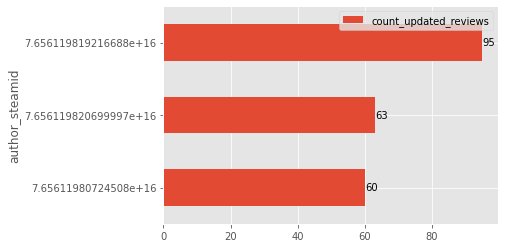

In [16]:
# =============================================================================
# 6.2
# =============================================================================

# TAKE ALL REVIEWS UPDATED, I.E.: DELTA > 0
data_6_2 = data_6[['author_steamid', 'app_id', 'delta']] \
    .query('delta > 0') \
        .copy()

# GET TOP 3 REVIEWERS WHICH UPDATE THEIR REVIEWS
# 1- GROUP BY user_id
# 2- COUNT THE NUMBER OF UPDATED REVIEWS FOR EACH USER
# 3- SORT BY COUNT DESCENDING
# 4- GET TOP 3 ROWS (USERS WITH MOST REVIEWS)
# 5- GET user_id AS COLUMN
top_3 = data_6_2 \
    .groupby('author_steamid') \
    .agg(count_updated_reviews=('app_id', 'count')) \
    .sort_values(by='count_updated_reviews', ascending=False) \
    .head(3) \
    .reset_index()

# PLOT TOP 3 USERS AND THE COUNT OF UPDATED REVIEWS
ax = top_3.plot(y='count_updated_reviews', x='author_steamid', kind='barh')
ax.bar_label(ax.containers[0])
plt.gca().invert_yaxis()
plt.show()

In [17]:
del data_6; del data_6_2

### RQ7

In [18]:
# =============================================================================
# GET DATA
# =============================================================================
data_7 = get_data( # GETTING DATASET (BASE + BONUSES) WITH SPECIFIC COLUMNS
                path="",
                cols=['review_id',
                      'votes_funny',
                      'weighted_vote_score',
                      ]) \
            .dropna( # DROPPING ROWS WITH ALL NAN
                    how='all')


GETTING: steam_reviews.csv
-----ELAPSED TIME: 83.3003990650177

GETTING: steam_reviews_bonus_1.csv
-----ELAPSED TIME: 41.153544664382935

GETTING: steam_reviews_bonus_2.csv
-----ELAPSED TIME: 29.54251480102539


In [19]:
# =============================================================================
# 7.1 - probability that a review has a Weighted Vote Score equal to or bigger than 0.5
# =============================================================================

# P(weighted_vote_score > 0.5) = # of reviews with weighted_vote_score >= 0.5 / #of all possible cases
answer_7_1 = data_7.query('weighted_vote_score >= 0.5').shape[0] / data_7.shape[0]
print("The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is:",answer_7_1)

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is: 0.21751917723260714


In [21]:
# =============================================================================
# 7.2
# =============================================================================
# Q: probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5

# P(a ∩ b) = P(vote_funny>=1 ∩ weighted_vote_score > 0.5)
p_A_and_B = data_7.query('votes_funny >= 1 and weighted_vote_score > 0.5').shape[0] / data_7.shape[0]

# P(a|b) = P(weighted_vote_score > 0.5)
p_B = data_7.query('weighted_vote_score > 0.5').shape[0] / data_7.shape[0]

# P(a|b) = P(vote_funny>=1|weighted_vote_score > 0.5) = P(vote_funny>=1 ∩ weighted_vote_score > 0.5) / P(weighted_vote_score > 0.5)
answer_7_2 = p_A_and_B / p_B
print("The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is:",answer_7_2)

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is: 0.1907303210395985


In [22]:
# =============================================================================
# 7.3
# =============================================================================

#INDIPENDENCE SUFFICIENT CONDITION: P(A | B) = P(A)
p_A = data_7.query('votes_funny >= 1').shape[0] / data_7.shape[0]
print("""
      P(A | B) = {ab:.3f} {cond} P(A) = {a:.3f}
      """.format(
          ab = answer_7_2,
          cond = '≈' if round(answer_7_2, 3) == round(p_A, 3) else '!=',
          a = p_A
          )     
      )


      P(A | B) = 0.191 != P(A) = 0.117
      


In [23]:
# ADDITIONALLY, WE COMPUTE THE CHI2 TEST FOR INDIPENDENCE BETWEEN
# "weighted_vote_score" and "votes_funny"

from scipy.stats import chi2_contingency

# SET THE ERROR LEVEL ALPHA
ALPHA = 0.05

# COMPUTE NEW COLUMNS
# 1) wvs_get_05 = Weighted_Vote_Score Greater or Equal Then 0.5
# 2) al_1f = At Least 1 Funny
data_7['wvs_get_05'] = np.vectorize( lambda value: 1 if value >= 0.5 else 0)(data_7['weighted_vote_score'])   
data_7['al_1f'] = np.vectorize(lambda value: 1 if value >= 1 else 0)(data_7['votes_funny'])  

# CALCULATE THE CROSS-TABLE
cross_tab = pd.crosstab(data_7['wvs_get_05'], data_7['al_1f'])

# GET THE CHI2 VALUE, P-VALUE AND EXPECTED INDIPENDENT CROSS-TABLE
c, p, dof, expected = chi2_contingency(cross_tab)

# PRINT THE RESULTS
print("""
      "weighted_vote_score" and "votes_funny" are {response}
      The p-value is: {p} {sign} {alpha} (alpha)
      """.format(
              response = 'DEPENDENT' if p <= ALPHA else 'INDIPENDENT',
              p = p,
              alpha = ALPHA,
              sign = '<=' if p <= ALPHA else '>'
              )
      )

ImportError: DLL load failed while importing _arpack: Impossibile trovare la procedura specificata.

In [ ]:
del data_7

### RQ8

In [3]:
# =============================================================================
# RQ8
# =============================================================================
from scipy.stats import kruskal

data_8 = get_data( # GETTING DATASET (BASE + BONUSES) WITH SPECIFIC COLUMNS
                path="",
                cols=['review_id',
                      'language',
                      'weighted_vote_score',
                      'timestamp_created',
                      'timestamp_updated',
                      'recommended'
                      ]) \
            .dropna( # DROPPING ROWS WITH ALL NAN
                    how='all')
            
ALPHA = 0.05

ImportError: DLL load failed while importing _arpack: Impossibile trovare la procedura specificata.

In [4]:
# =============================================================================
# 8.1 significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?
# =============================================================================
data_8_1 = data_8 \
    .query("language.str.contains('hines') or language.str.contains('ussia')", engine='python') \
        .copy()

# THERE ARE 2 TYPE OF CHINESE: "schinese"( STANDARD CHINESE) AND "tchinese"( TRADITIONAL CHINESE)   
data_8_1['language'].unique()

# WE WILL ENCODE THEM AS CHINESE
data_8_1['language'] = np.vectorize(lambda value: 'chinese' if value in ('tchinese', 'schinese') else value)(data_8_1['language'])   


# DROP NAN AND SORT VALUES
chinese_wvs = data_8_1.query('language == "chinese"')['weighted_vote_score'].dropna().sort_values()
russian_wvs = data_8_1.query('language == "russian"')['weighted_vote_score'].dropna().sort_values()

# KRUSKAL TEST (WE ARE USING KRUSKAL INSTEAD OF ANOVA 1-WAY TEST DUE TO THE 
# FAILED PREREQUISITE OF NORMAL DISTRIBUTION OF THE TWO GROUPS. IN FACT:
chinese_wvs.plot.hist(bins=200)
russian_wvs.plot.hist(bins=200)

# KRUSKAL - NULL HYPOTHESIS: THE MEDIAN OF THE TWO VARIABLES ARE EQUAL.
# ALTERNATIVE HYPOTHESIS: THE MEDIAN ARE DIFFERENT.
test = kruskal(
    chinese_wvs.tolist(),
    russian_wvs.tolist()
    )
test.pvalue
print(""""
      We reject the{hyp} hypothesis. The median of the two distributions
      are {cond}different. The p-value is: {p}{sign}{alpha}""".format(
          hyp = " NULL" if test.pvalue < ALPHA else " ALTERNATIVE",
          cond =  "" if test.pvalue < ALPHA else "not ",
          p = test.pvalue,
          sign = " < " if test.pvalue < ALPHA else " >= ",
          alpha = ALPHA)
      )
    
del chinese_wvs; del russian_wvs; del data_8_1

NameError: name 'data_8' is not defined

In [ ]:
# =============================================================================
# 8.2 - Is there significant relationship between the time that a user lets pass 
#       beforehe updates the review and the Weighted Vote Score?
# =============================================================================

# PRE-PROCESS TIMESTAMPS LIKE IN RQ6
data_8['timestamp_created'] = np.vectorize(process_timestamp)(data_8['timestamp_created'])   
data_8['timestamp_updated'] = np.vectorize(process_timestamp)(data_8['timestamp_updated'])

# CALCULATE DELTA
data_8['delta'] = data_8['timestamp_updated'] - data_8['timestamp_created']

# FILTER NAN
data_8_2 = data_8[['weighted_vote_score', 'timestamp_created', 'timestamp_updated', 'delta']] \
    .copy() \
        .dropna()

# PLOT THE DATA DISTRIBUTION. WE AGGREGATE THE COUNT IN HEXAGONL BINS WITH LOG 
# TRANSFORMATION IN ORDER TO ATTENUATE DIFFERENCES BETWEEN BINS
data_8_2.plot.hexbin(x='weighted_vote_score', y='delta', gridsize=25, 
                     reduce_C_function=np.sum, 
                     bins='log')

# CALCULATE THE CORRELATION
corr = data_8_2['weighted_vote_score'].corr(data_8_2['delta'])

# PRINT THE RESULT
print("""
      'weighted_vote_score' and the 'time that a user lets pass before he 
      updates the review' ('delta') are{is_corr} correlated linearly. The correlation 
      value is: {corr}
      """.format(
      corr=corr,
      is_corr= '' if corr < -0.01 or corr > 0.01 else ' not'
      ))

del data_8_2

In [ ]:
# =============================================================================
# 8.3 - any change in the relationship of the variables mentioned in the previous 
#       literal if you include whether an application is recommended or not in the review?
# =============================================================================

data_8_3 = data_8[['weighted_vote_score', 'timestamp_created', 
                   'timestamp_updated', 'recommended', 'delta']] \
    .copy() \
        .dropna()

# REVIEWS RECOMMENDED
data_8_3_rec = data_8_3.query('recommended == True').copy()

# REVIEWS NOT RECOMMENDED
data_8_3_no = data_8_3.query('recommended == False').copy()

# CORRELATIONS AND PLOTS

# RECOMMENDED PLOT - HEXBIN PLOT WITH LOG TRANSOFRMATION FOR EACH BIN
data_8_3_rec.plot.hexbin(x='weighted_vote_score', y='delta', gridsize=25, 
                     reduce_C_function=np.sum, 
                     bins='log')

# RECOMMENDED CORRELATION
corr_rec = data_8_3_rec['weighted_vote_score'].corr(data_8_3_rec['delta'])
print(f'Correlation between time_deta and weighted_vote_score for reccomended games is: {corr_rec}')

# NOT RECOMMENDED PLOT - HEXBIN PLOT WITH LOG TRANSOFRMATION FOR EACH BIN
data_8_3_no.plot.hexbin(x='weighted_vote_score', y='delta', gridsize=25, 
                     reduce_C_function=np.sum, 
                     bins='log')

# NOT RECOMMENDED CORRELATION
corr_no = data_8_3_no['weighted_vote_score'].corr(data_8_3_no['delta'])
print(f'Correlation between time_deta and weighted_vote_score for not reccomended games is: {corr_no}')

In [ ]:
del data_8; del data_8_2

### 8.4

**Q:** What are histograms, bar plots, scatterplots and pie charts used for?

**A:** All these plots are useful tools for describing important info about
the distribution of the variable. 
In particular, an histogram shows the shape of the distribution of a 
quantitative continous variable( features). The data are aggregated in bins(
i.e.: the variable is divided in different intervals) and for each bin is 
counted the number of values in it. 
A bar plot, used for categorical data, shows the frequency of each category 
for a given variable. 
Scatter plot is a useful representation of two quantitative 
variables. It shows all the pairs of the two variables' values in cartesian
plane. It's useful to quickly notice some kind of correlation( linear, 
quadratic, etc )between two variables. 
Finally, pie chart is mainly used for qualitative variables. It shows proportion of 
all the categories of a given variable.
"""

### 8.5

Q: What insights can you extract from a Box Plot?
A: Box Plot shows useful statistics about the distribution of the variable. 
In particular, boxplot shows the percentiles *0th*( or min), *25th*, *50th*( or 
median), *75th* and 1*00th*( or max) of the distribution. The *25th* and *75th* 
percentile give the shape of the box whereas the *0/100th* percentile are the
"whiskers" of the plot. Another version of the box plot uses $± k σ$ (where k
is generally 2) as delimiter for the whiskers or $percentile 25th - 1.5 IQR$ and 
$percentile 75th + 1.5 IQR$ (where IQR stands for InterQuantileRange i.e., the difference between percentile *75th* and percentile *25th*). In this case, outliers are plotted as single points outside the whiskers.


### OTHER

<ipython-input-8-1d70f2e93c70>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp_created"][x] =  unixToHour(df["timestamp_created"][x])
C:\Users\alessio\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Most common time for writing a review is: 15:23 


Matplotlib is building the font cache; this may take a moment.


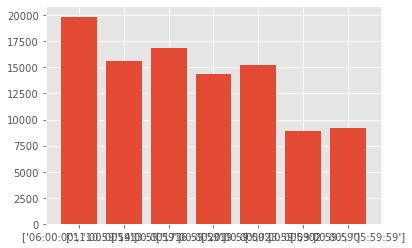

1

In [ ]:
#RQ 3
from datetime import datetime
unixToHour = lambda j: datetime.utcfromtimestamp(j).strftime('%H:%M:%S')

for x in range(len(df.review)):
    df["timestamp_created"][x] =  unixToHour(df["timestamp_created"][x])

d = {}
for x in df["timestamp_created"]:
    if x[:-3] not in list(d.keys()):
        d[x[:-3]]=0
    d[x[:-3]]+=1
sortList = sorted(d.items(), key=lambda x: x[1], reverse=True)

print("Most common time for writing a review is: %s " %sortList[0][0])

def func(timeInterv, dF): #assumo sia una list of lists [[Initial time, Final time],[...,...]]
    l=[]
    for x in timeInterv:
        t0, t1 = datetime.strptime(x[0],'%H:%M:%S'), datetime.strptime(x[1],'%H:%M:%S')
        cc = 0
        for y in range(len(dF.review)):
            if datetime.strptime(dF.timestamp_created[y],'%H:%M:%S') >= t0 and  datetime.strptime(dF.timestamp_created[y],'%H:%M:%S') <=t1:
                cc+=1
        l.append([x,cc])

    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    plt.bar([str(x[0]) for x in l], [x[1] for x in l])
    plt.show()
    return None

func([["06:00:00","10:59:59"], ["11:00:00", "13:59:59"], ["14:00:00","16:59:59"], ["17:00:00","19:59:59"], ["20:00:00","23:59:59"],["00:00:00","02:59:59"], ["03:00:00","05:59:59"]], df)


### THEORICAL QUESTIONS


### TQ1

**TQ1.1**

This algorithm finds the k-th element of the array A, as if it was sorted in ascending order.

Converting the pseudocode to Python code, we can generate few examples.

In [ ]:
import random


def alg(A, k, counter):  
      if counter>2*len(A):
            raise RecursionError
            
      counter+=1      
      s = random.choice(A) #<-- a random element of A
      L = [x for x in A if x <= s] #[all the elements of A with value <= s]
      R = [x for x in A if x > s]  #[all the elements of A with value > s]
      r = len(L)
      if k == r:
        return s
      elif k < r:  
        return alg(L, k, counter)
      else:
        return alg(R, k - r, counter)
      
    
array = [1,3,2,4,6,5,9,8,7,10,10]
print("Length of the array:", len(array))
ex1 = alg(array, 11, 0)
print("Result:", ex1)
print("11-th element of the sorted array:", sorted(array)[11-1]) #in Python indexes start 
#at zero, thus the 11-th element has index 10.

Length of the array: 11
Result: 10
11-th element of the sorted array: 10


However, the algorithm may incur in infinite recursions, if repeated values are contained in the vector. 
When A reduces to a vector of identical elements, the algorithm will continue to enter in the *elif condition*, that does not modify either L or k, hence in all the followings iterations the "new A" and s will remain constant, and the algorithm will infinitely iterate.

We give an example in the code below:

In [ ]:
array1 = [1,2,2,2,3]
print("Length of the array:", len(array))
try:
    ex1 = alg(array1, 2, 0) #if k=2 or k=3  
except RecursionError as e:
    print("Recursion Error: Infinite Loop")

print("11-th element of the sorted array:", sorted(array1)[1-1])

Length of the array: 11
11-th element of the sorted array: 1


**TQ1.2**

Worst Case Analysis (*Big O*):
```
function alg(A, k):
\# steps
  1      s <-- a random element of A
  n      set L = [all the elements of A with value <= s]
  n      set R = [all the elements of A with value > s]
  1      r = len(L)
  1      if k == r: return s
 T(n)    else if k < r: return alg(L, k)
 T(n)    else: return alg(R, k - r)
```

Our intuition suggests that the worst case is O(n^2), since you can at most call the function n times (assuming it is not a infinite recursion case), and each of these n iterations has cost 2n.

More formally:
$T(n) = T(n-1)+2n = (T(n-2)+2n)+2n=...=T(n-i)+i(2n) $

Limit case: $n-i=1$ and
$i=n-1$
$T(n-(n-1))+(n-1)*2n=T(n-n+1)+2n^2-2n=T(1)+2n^2-2n = O(2n^2-2n) = O(n^2)$

**TQ1.3**

Best Case:

In the best case scenario, the algorithm enters in the first *if condition*, thus the recursion does not happen, and the computational cost is O(2n) that is O(n).



### TQ2

**TQ2.1**

Let us call T() the splitSwap() function, and S() the swapList() function

$T(a,0,n) = T(a, 0, n/2) + T(a, n/2, n/2) + S(a, 0, n)$

$T(a, 0, n/2) = [T(a, 0, n/4) + T(a, n/4, n/4) + S(a, 0, n/2) $
$T(a, n/2, n/2) = [T(a, n/2, n/4) + T(a, n/4, n/4) + S(a, n/2, n/2) $
$S(a, 0, n) = n/2  $

Consider the scenario where len(a) and n are numbers that are a power of 2: The recursion will stop when $n/(2^i) == 1$ that is i=log_2 * n

Then, $$

sommatoria_1_log_2(2^i) -> sommatoria_...(2^(log_2 * n)) -- sommatoria_1_log_2 (n)--> nlogn !



Alternatively: 

T(,,n) = 2 * T(,,n/2) + S(,,n)

That, for the second case of the Master theorem for divide-and-conquer recurrences, has complexity $O(nlogn)$

**TQ2.2**



In [ ]:
def splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n/2, n/2)
  swapList(a, l, n)


def swapList(a, l, n):
  l = int(l)
  n_half = int(n/2)
  for i in range(n_half):
    tmp = a[l + i]
    a[l + i] = a[l + n_half + i]
    a[l + n_half + i] = tmp
  print('swapList - n:', n , "l=",l,'a=',a)

In [ ]:
#for l in [1, 2, 3, 4]:
#  for n in [1, 2, 4]:
#    a = [1,2,3,4,5,6,7,8] #[5, 3, 2, 4, 1 ,7, 8, 2]
#    splitSwap(a, l, n)
#    print("l:",l ,"n:",n,"a:",a)
 
a=[1,2,3,4,5,6,7,8]
print("original a=", a)
splitSwap(a=a, l=0,n=8)
print("l:",0 ,"n:",8,"final a=",a)

original a= [1, 2, 3, 4, 5, 6, 7, 8]
swapList - n: 2.0 l= 0 a= [2, 1, 3, 4, 5, 6, 7, 8]
swapList - n: 2.0 l= 2 a= [2, 1, 4, 3, 5, 6, 7, 8]
swapList - n: 4.0 l= 0 a= [4, 3, 2, 1, 5, 6, 7, 8]
swapList - n: 2.0 l= 4 a= [4, 3, 2, 1, 6, 5, 7, 8]
swapList - n: 2.0 l= 6 a= [4, 3, 2, 1, 6, 5, 8, 7]
swapList - n: 4.0 l= 4 a= [4, 3, 2, 1, 8, 7, 6, 5]
swapList - n: 8 l= 0 a= [8, 7, 6, 5, 4, 3, 2, 1]
l: 0 n: 8 final a= [8, 7, 6, 5, 4, 3, 2, 1]


SplitSwap is a recursive function that reverses elements in the array, from element $l$ to element $l+n$.

At first, *splitSwap* is recursively applied until $n<=1$, (i.e., $log_2(n)$ times). Then, in the backward phase *swapList* is called $2^2+2^1+2^0$ times. As shown in the example above, in the third level adjacent elements are swapped, 

At level n=2, it swaps elements at index distance $±2^0$, e.g. 1th with 2th.

At level n=4, it swaps elements at index distance $±2^1$, e.g. 1th with 3th.

At level n=8, it swaps elements at index distance $±2^2$, e.g. 1th with 5th.

### TQ3


### **Case 1** 
W = 12


|name  |weight   |value   |cum. w.   |cum. v.   |
|---|---|---|---|---|
|a   |6   |1    |6        |1   |
|b   |5   |2    |**11**   |**3**   |
|c   |3   |5    |14       |8   |
|d   |1   | 12  |15       |20

**Actual solution:** a + b = 3

**Best solution:** b + c + d = 19

---------------------------------------------------
### **Case 2** 
W = 12


|name  |weight   |value   |cum. w.   |cum. v.   |
|---|---|---|---|---|
|a   |9   |10    |9        |10   |
|b   |3   |9     |**12**   |**19**   |
|c   |4   |7     |16       |26   |
|d   |5   |6     |21       |32   |


**Actual solution:** a + b = 19

**Best solution:** b + c + d = 22

---------------------------------------------------

### **Case 3** 
W = 12


|name  |weight   |value | ratio  |cum. w.   |cum. v.   |
|---|---|---|---|---|---|
|a   |10   |20  |2.000  |**10**    |**20**   |
|b   |8   |15   |1.875  |18    |35   |
|c   |4   |7   |1.750  |22      |42   |
|d   |3   |5   |1.667  |25     |47   |


**Actual solution:** a = 20

**Best solution:** b + c = 22
